In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

In [4]:
def overview(df, name):
    print(f"\n{name} Overview:")
    print(df.info())
    print("\nHead:\n", df.head())
    print("\nMissing Values:\n", df.isnull().sum())

overview(customers, "Customers")
overview(products, "Products")
overview(transactions, "Transactions")
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

print("\nSummary Statistics:")
print(merged.describe())


Customers Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Head:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (to

<ipython-input-6-99fcdf1aba89>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_dist.index, y=region_dist.values, palette='viridis')


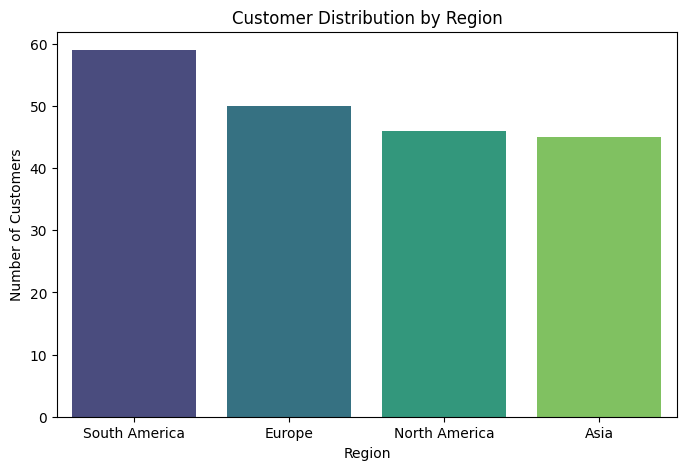

In [6]:
# 1. Customer Region Distribution
region_dist = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_dist.index, y=region_dist.values, palette='viridis')
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

<ipython-input-7-e1eebf9a7ae6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='crest')


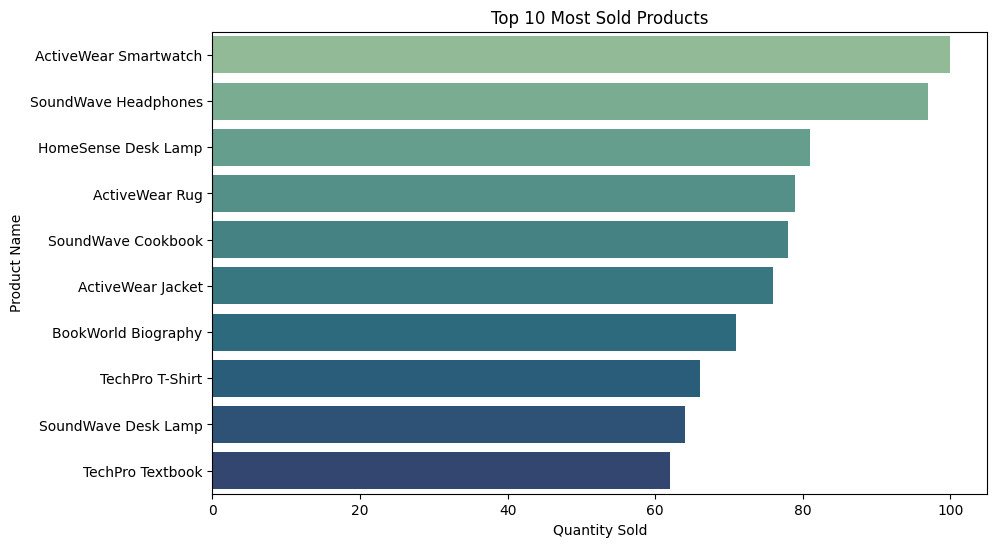

In [7]:
# 2. Most Sold Products
top_products = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='crest')
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

<ipython-input-8-e4f2d6fd51b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='magma')


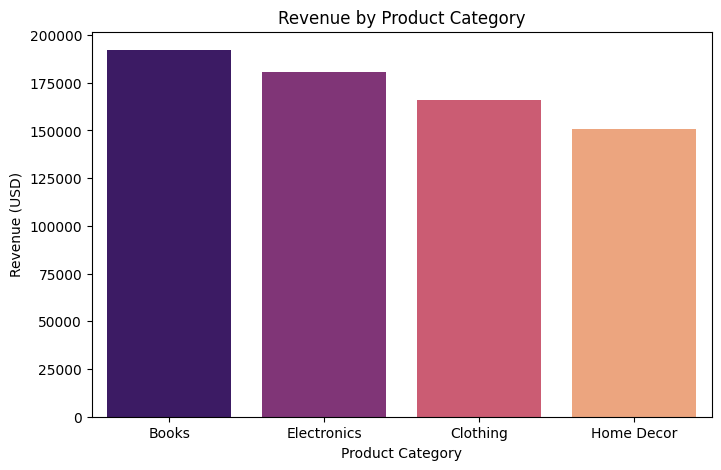

In [8]:
# 3. Revenue by Product Category
category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='magma')
plt.title("Revenue by Product Category")
plt.ylabel("Revenue (USD)")
plt.xlabel("Product Category")
plt.show()

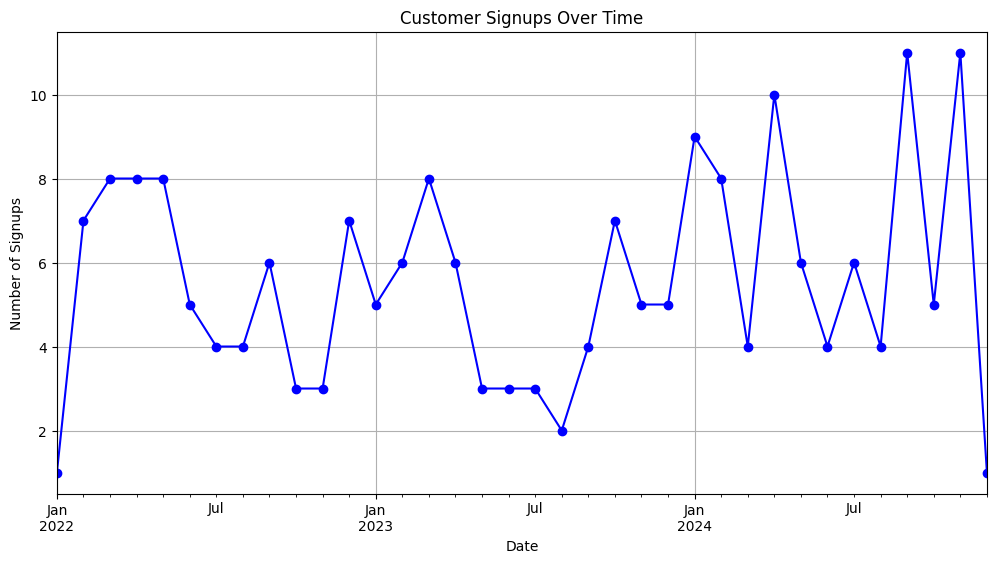

In [9]:
# 4. Signup Trends Over Time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='blue')
plt.title("Customer Signups Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()

<ipython-input-10-b03164bd3590>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_revenue_customers.values, y=high_revenue_customers.index, palette='cool')


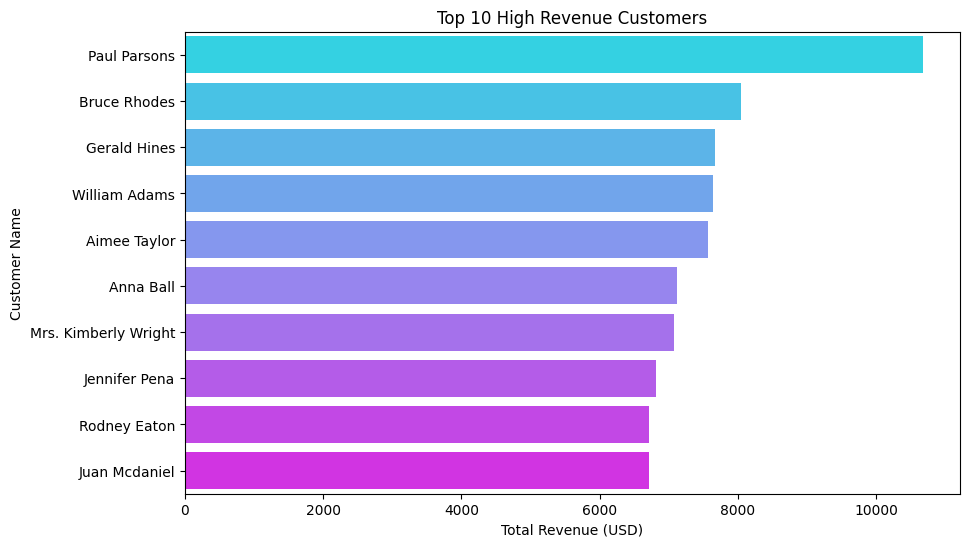

In [10]:
# 5. High Revenue Customers
high_revenue_customers = merged.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=high_revenue_customers.values, y=high_revenue_customers.index, palette='cool')
plt.title("Top 10 High Revenue Customers")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer Name")
plt.show()

In [11]:
eda_results = {
    "Region Distribution": region_dist,
    "Top Products": top_products,
    "Category Revenue": category_revenue,
    "Signup Trends": signup_trends,
    "High Revenue Customers": high_revenue_customers
}

# Save results to csv
region_dist.to_csv("region_distribution.csv")
top_products.to_csv("top_products.csv")
category_revenue.to_csv("category_revenue.csv")
signup_trends.to_csv("signup_trends.csv")
high_revenue_customers.to_csv("high_revenue_customers.csv")